In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

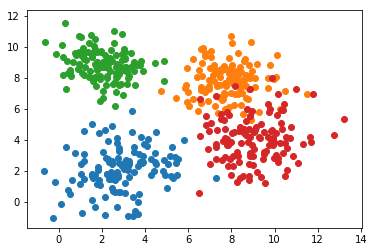

In [2]:
def createDataset(k, means, std, size=500):
    data = np.empty( (0,3) )
    for cluster in range(k):
        pts = np.random.normal(means[cluster], std[cluster], size=(size//k,2))
        pts = np.c_[pts, np.ones(size//k)*cluster ]
        data = np.append( data, pts, axis=0)
    np.random.shuffle(data)
    return data
data = createDataset( 4, [ (3,2), (8,8), (2,9), (9,4) ], [ 1.5, 1.1, 1, 1.4] )
for k in range(4):
    temp = data[:,0:2][data[:,2]==k]
    plt.scatter( temp[:,0], temp[:,1],  )

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split( data[:,0:2],data[:,2],test_size=0.2, stratify=data[:,2] )
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((400, 2), (100, 2), (400,), (100,))

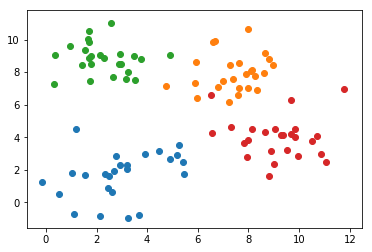

In [4]:
#our test data
for k in range(4):
    temp = X_test[Y_test==k]
    plt.scatter( temp[:,0], temp[:,1],  )

#### Euclidean Distance

$ d = \sqrt{ \sum_{i=0}^{k} \big(X_i - Y_i \big)^2 } $

In [5]:
def distance( X1,X2 ):
    return np.sqrt( np.sum( (X1-X2)**2, axis=1) )

In [6]:
def areCentersChanged(new,old):
    "check if centers are changed"
    for n,o in zip(new,old):
        if n!=o: return True
    return False

def getNewMeans( k, data, initial_centers ):
    newCluster = np.empty((len(data),0))
    #find distance from each cluster mean
    for i in range(k):
        newCluster = np.c_[ newCluster, distance(data,np.array(initial_centers[i])) ]
    #get cluster name
    newCluster = np.argmin(newCluster,axis=1)
    new_means = []
    #get new means
    for i in range(k):
        newPoints = X_train[newCluster==i]
        if len(newPoints)==0: new_means.append( initial_centers[i])
        else: new_means.append( tuple( newPoints.mean(axis=0) )  )
    return new_means

#### K-Means ++
K-Means++ is a smart way to select initial cluster center. It helps to optimize K-Means faster.

Here we are using random initialization only.

In [7]:
def getRandomCenters(data,k):
    X = np.random.randint( data[:,0].min(), data[:,0].max(), size=k )
    Y = np.random.randint( data[:,1].min(), data[:,1].max(), size=k )
    return [ (x,y) for x,y in zip(X,Y) ]
initial_centers = getRandomCenters(X_train,4)

In [8]:
old_centers = [None,None,None,None]
i=1
while areCentersChanged(initial_centers,old_centers):
    print(f'Iteration {i}');i+=1
    old_centers = initial_centers
    initial_centers = getNewMeans( 4, X_train, initial_centers)
print(f'Clusters Centers Found : {initial_centers}')

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Clusters Centers Found : [(9.030267205974946, 3.87415779338764), (2.8193121728885457, 2.090226578949068), (7.944713057502554, 7.753394996651528), (2.0614414080250705, 8.780765929802271)]


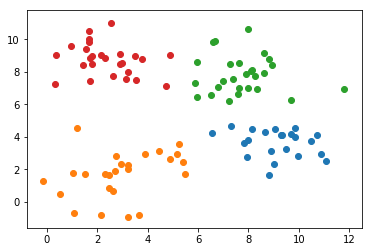

In [9]:
def getClusters( data, centers ):
    cluster = np.empty((len(data),0))
    for i in range(len(centers)):
        cluster = np.c_[ cluster, distance(data,np.array(centers[i])) ]
    return np.argmin(cluster,axis=1)
cluster = getClusters(X_test,initial_centers)
for i in range(4):
    plt.scatter( X_test[:,0][cluster==i], X_test[:,1][cluster==i] )

#### Adjusted Rand Score
It is a metric which computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

In [10]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(Y_test, cluster,)

0.8973535820622432

#### Elbow Method
1. It is a method to find number of cluster that are possible in given data.
2. Uses sum of squared distances vs number of clusters.
3. When the plot takes a sharp curve (creates a elbow). That is optimal number of cluster.
4. This means increasing number of cluster center is not having much impact on overall distance form center.

Text(0,0.5,'Sum of Squared Distance')

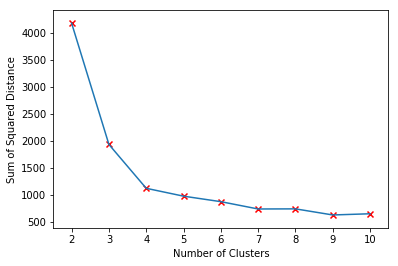

In [11]:
ssd = []
K = [2,3,4,5,6,7,8,9,10]
for k in K:
    new = getRandomCenters(X_train,k)
    old = [None, None, None, None]
    while areCentersChanged(new,old):
        old = new
        new = getNewMeans( k, X_train, new)
    cluster = getClusters(X_train,new)
    temp = 0
    for i in range(k):
        temp += np.sum( np.square(distance(X_train[cluster==i], np.array(new[i]))))
    ssd.append(temp)
plt.plot(K,ssd)
for k,s in zip(K,ssd): plt.scatter( k,s, marker='x', c='r' )
plt.xlabel( 'Number of Clusters' )
plt.ylabel( 'Sum of Squared Distance' )